In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [21]:
csv_file_path = 'twitter_influencer_network_100_users_measures.csv'

# Data Loading & Initial Inspection ---
try:
    df_measures = pd.read_csv(csv_file_path)
    print(f"Successfully loaded data from '{csv_file_path}'")
    print("\nDataFrame Head (first 5 rows):")
    print(df_measures.head())

    print("\nDataFrame Info:")
    df_measures.info()

    print("\nDataFrame Basic Statistics:")
    print(df_measures.describe())

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the CSV was generated correctly.")
    exit()

Successfully loaded data from 'twitter_influencer_network_100_users_measures.csv'

DataFrame Head (first 5 rows):
      Node  In_Degree  Out_Degree  Total_Degree  In_Degree_Centrality  \
0  User_52          5           7            12              0.050505   
1  User_93          7           4            11              0.070707   
2  User_15          5           5            10              0.050505   
3  User_72          3           5             8              0.030303   
4  User_61          7           4            11              0.070707   

   Out_Degree_Centrality  Closeness_Centrality  Betweenness_Centrality  \
0               0.070707              0.318066                0.032030   
1               0.040404              0.335675                0.011658   
2               0.050505              0.335675                0.031852   
3               0.050505              0.294864                0.011422   
4               0.040404              0.363334                0.017781   

  

In [22]:
# Influencer Identification & Analysis ---
print("\n--- Influencer Identification ---")

#  Top Influencers by Eigenvector Centrality (true influence)
print("\nTop 10 Influencers by Eigenvector Centrality:")
top_eigen_influencers = df_measures.sort_values(by='Eigenvector_Centrality', ascending=False).head(10)
print(top_eigen_influencers[['Node', 'Eigenvector_Centrality', 'In_Degree', 'Out_Degree']])

# Top Influencers by In-Degree Centrality (popularity/attention received)
print("\nTop 10 Influencers by In-Degree Centrality (Popularity):")
top_in_degree_influencers = df_measures.sort_values(by='In_Degree_Centrality', ascending=False).head(10)
print(top_in_degree_influencers[['Node', 'In_Degree_Centrality', 'In_Degree']])

#  Top Influencers by Betweenness Centrality (bridges/gatekeepers)
print("\nTop 10 Influencers by Betweenness Centrality (Bridges/Gatekeepers):")
top_betweenness_influencers = df_measures.sort_values(by='Betweenness_Centrality', ascending=False).head(10)
print(top_betweenness_influencers[['Node', 'Betweenness_Centrality', 'In_Degree', 'Out_Degree']])

# Top Active Users by Out-Degree Centrality (broadcasters)
print("\nTop 10 Most Active Users by Out-Degree Centrality (Broadcasters):")
top_out_degree_influencers = df_measures.sort_values(by='Out_Degree_Centrality', ascending=False).head(10)
print(top_out_degree_influencers[['Node', 'Out_Degree_Centrality', 'Out_Degree']])


--- Influencer Identification ---

Top 10 Influencers by Eigenvector Centrality:
       Node  Eigenvector_Centrality  In_Degree  Out_Degree
48  User_36                0.197542          9           3
5   User_21                0.187116          7           3
30  User_47                0.186972          9           3
97  User_25                0.172099          8           2
95  User_67                0.170319          7           3
56  User_48                0.169927          6           5
80  User_13                0.160912          9           1
22  User_89                0.159290          7           7
35  User_39                0.145984          8           4
37   User_4                0.145174          7           4

Top 10 Influencers by In-Degree Centrality (Popularity):
       Node  In_Degree_Centrality  In_Degree
30  User_47              0.090909          9
48  User_36              0.090909          9
80  User_13              0.090909          9
35  User_39              0.0808

In [23]:
# General Network Characteristics 
print("\n--- Overall Network Characteristics ---")
# Extract graph-level measures from the first row (or a dedicated row if you structured it differently)
network_stats = df_measures.iloc[0][['Graph_Density', 'Graph_Reciprocity', 'Graph_Transitivity',
                                     'Graph_In_Degree_Centralization', 'Graph_Out_Degree_Centralization']]
print(network_stats)

# Basic Interpretation:
print("\n--- Interpretation of Network Characteristics ---")
if network_stats['Graph_Density'] < 0.1:
    print(f"Density ({network_stats['Graph_Density']:.4f}): The network is quite sparse, meaning connections are relatively few compared to possible connections.")
elif network_stats['Graph_Density'] < 0.3:
    print(f"Density ({network_stats['Graph_Density']:.4f}): The network has a moderate density.")
else:
    print(f"Density ({network_stats['Graph_Density']:.4f}): The network is relatively dense, indicating many interactions.")

if network_stats['Graph_Reciprocity'] > 0.5:
    print(f"Reciprocity ({network_stats['Graph_Reciprocity']:.4f}): Interactions are often reciprocated, suggesting mutual relationships are common.")
else:
    print(f"Reciprocity ({network_stats['Graph_Reciprocity']:.4f}): Interactions are less often reciprocated, potentially more one-sided or broadcast-like.")

if network_stats['Graph_Transitivity'] > 0.1:
    print(f"Transitivity ({network_stats['Graph_Transitivity']:.4f}): There's a notable tendency for users to form closed triangles/cliques (friends of friends are friends).")
else:
    print(f"Transitivity ({network_stats['Graph_Transitivity']:.4f}): The network has a lower tendency to form tightly-knit clusters.")

if network_stats['Graph_In_Degree_Centralization'] > 0.2:
    print(f"In-Degree Centralization ({network_stats['Graph_In_Degree_Centralization']:.4f}): Inbound attention is somewhat centralized around a few users.")
else:
    print(f"In-Degree Centralization ({network_stats['Graph_In_Degree_Centralization']:.4f}): Inbound attention is more distributed across users.")

if network_stats['Graph_Out_Degree_Centralization'] > 0.2:
    print(f"Out-Degree Centralization ({network_stats['Graph_Out_Degree_Centralization']:.4f}): Outbound communication is somewhat centralized from a few users.")
else:
    print(f"Out-Degree Centralization ({network_stats['Graph_Out_Degree_Centralization']:.4f}): Outbound communication is more distributed among users.")


--- Overall Network Characteristics ---
Graph_Density                      0.048788
Graph_Reciprocity                  0.045549
Graph_Transitivity                 0.094808
Graph_In_Degree_Centralization     0.042547
Graph_Out_Degree_Centralization    0.073156
Name: 0, dtype: object

--- Interpretation of Network Characteristics ---
Density (0.0488): The network is quite sparse, meaning connections are relatively few compared to possible connections.
Reciprocity (0.0455): Interactions are less often reciprocated, potentially more one-sided or broadcast-like.
Transitivity (0.0948): The network has a lower tendency to form tightly-knit clusters.
In-Degree Centralization (0.0425): Inbound attention is more distributed across users.
Out-Degree Centralization (0.0732): Outbound communication is more distributed among users.


In [24]:
num_users = 100
users = [f"User_{i}" for i in range(1, num_users + 1)]
np.random.seed(42)
interactions_data = []
num_interactions = 5 * num_users
for _ in range(num_interactions):
    source = np.random.choice(users)
    target = np.random.choice(users)
    if source != target:
        interactions_data.append((source, target))

G = nx.DiGraph() 
G.add_edges_from(interactions_data)

print(f"Graph recreated with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges for visualization.")

Graph recreated with 100 nodes and 483 edges for visualization.


In [25]:
# Map Node Names to their Centrality Measures
node_eigenvector_centrality = df_measures.set_index('Node')['Eigenvector_Centrality'].to_dict()
node_total_degree = df_measures.set_index('Node')['Total_Degree'].to_dict()
node_in_degree = df_measures.set_index('Node')['In_Degree'].to_dict()


# Node Sizes: Scale based on Total Degree 
node_size_multiplier = 100
base_node_size = 300
node_sizes = [node_total_degree.get(node, 0) * node_size_multiplier + base_node_size for node in G.nodes()]

# Node Colors: Use a colormap based on Eigenvector Centrality
eigen_values = [node_eigenvector_centrality.get(node, 0) for node in G.nodes()]

# Normalize centrality values to map to colormap range [0, 1]
if len(eigen_values) > 0 and max(eigen_values) > 0:
    norm = plt.Normalize(vmin=min(eigen_values), vmax=max(eigen_values))
    cmap = cm.viridis # Choose a colormap (e.g., 'viridis', 'plasma', 'magma', 'coolwarm')
    node_colors = [cmap(norm(val)) for val in eigen_values]
else:
    node_colors = ['skyblue'] * G.number_of_nodes() # Default if no variation

# Labels: Only show labels for the top X influencers (e.g., top 10 by Eigenvector Centrality)
top_n_labels = 10
sorted_nodes_by_eigen = sorted(node_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
labels_to_show = {node: node for node, value in sorted_nodes_by_eigen[:top_n_labels]}

# Create a dictionary of labels for nx.draw_networkx_labels, ensuring only top N are included
node_labels = {node: node if node in labels_to_show else "" for node in G.nodes()}

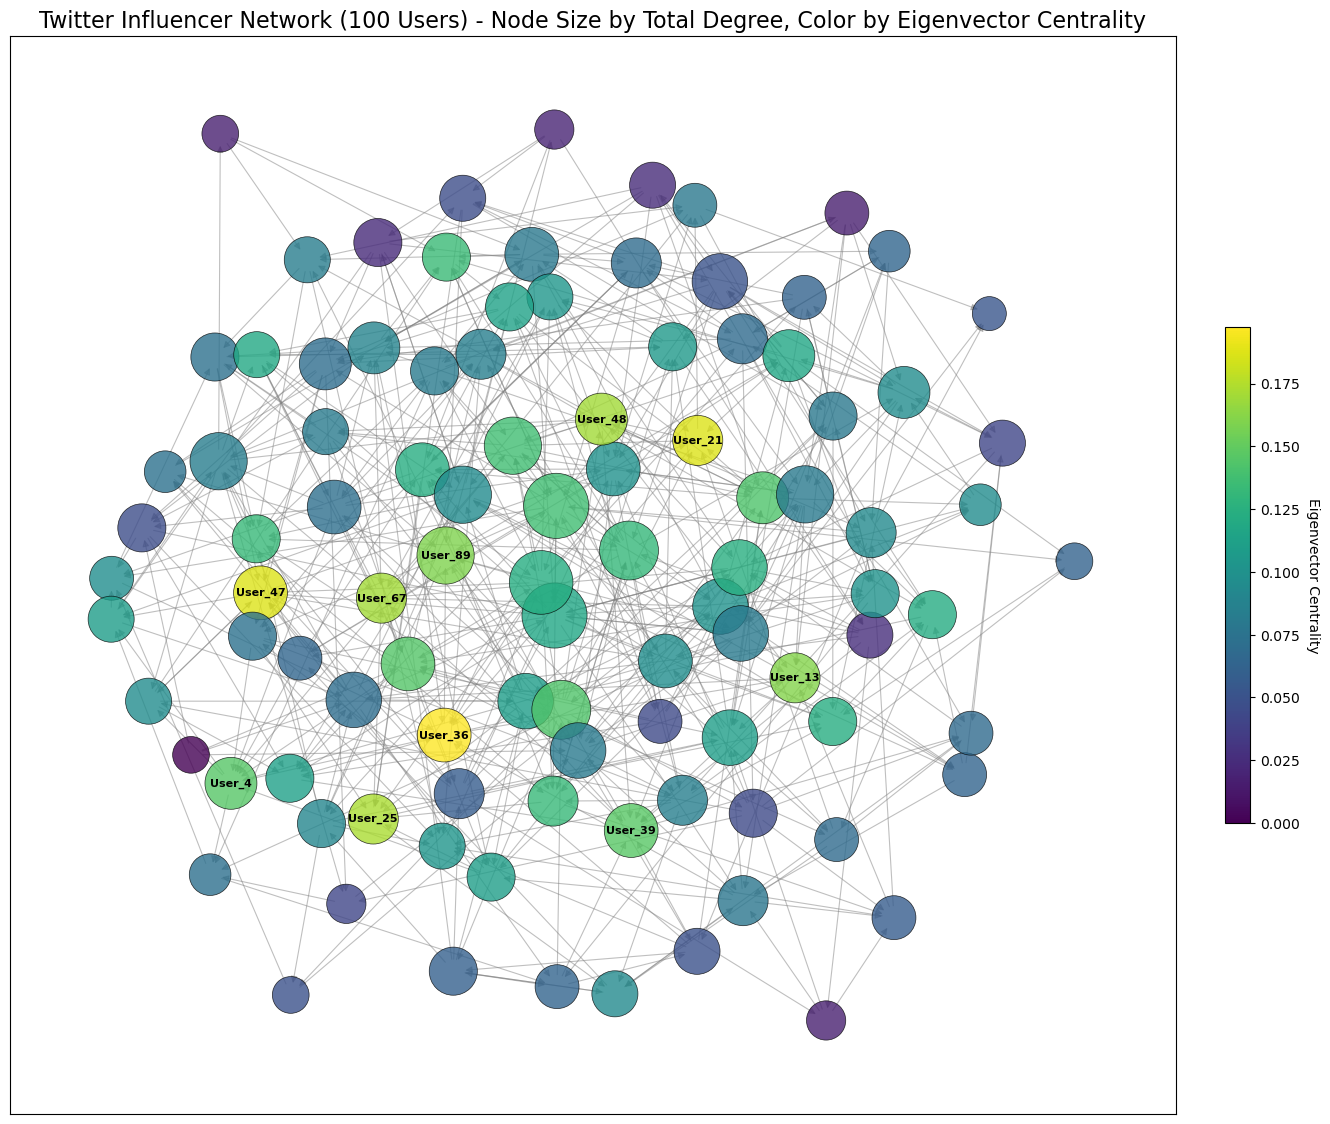

Network visualization displayed. Only top 10 influencers are labeled for clarity.


In [ ]:
#  Visualize the Network 
plt.figure(figsize=(16, 14)) 
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_nodes(G, pos,
                       node_color=node_colors,
                       node_size=node_sizes,
                       alpha=0.8,
                       edgecolors='black',
                       linewidths=0.5)

nx.draw_networkx_edges(G, pos,
                       edge_color='gray', 
                       width=0.8, 
                       alpha=0.5, 
                       arrows=True, 
                       arrowsize=10)

# Draw labels only for selected nodes
nx.draw_networkx_labels(G, pos,
                        labels=node_labels,
                        font_size=8,
                        font_color='black',
                        font_weight='bold')

# Add a colorbar to explain Eigenvector Centrality
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(eigen_values)
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Eigenvector Centrality', rotation=270, labelpad=15)

plt.title(f"Twitter Influencer Network ({num_users} Users) - Node Size by Total Degree, Color by Eigenvector Centrality", fontsize=16)
plt.show()

print("Network visualization displayed. Only top 10 influencers are labeled for clarity.")

Preparing visualization...


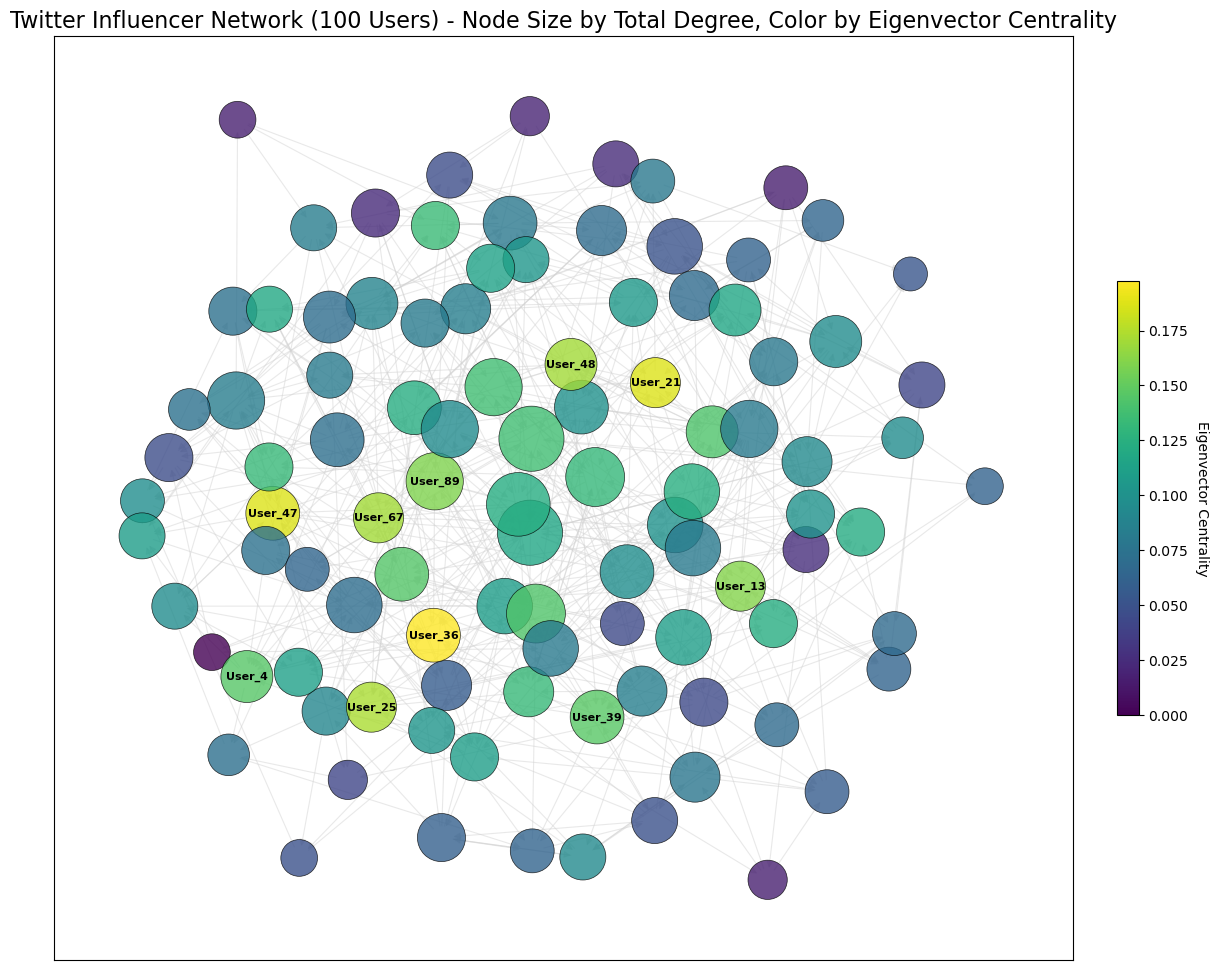

Network visualization displayed. Only top 10 influencers are labeled for clarity.


In [27]:
print("Preparing visualization...")

# Map Node Names to their Centrality Measures
node_eigenvector_centrality = df_measures.set_index('Node')['Eigenvector_Centrality'].to_dict()
node_total_degree = df_measures.set_index('Node')['Total_Degree'].to_dict()

# Node Sizes: Scale based on Total Degree
node_size_multiplier = 100
base_node_size = 300
node_sizes = [node_total_degree.get(node, 0) * node_size_multiplier + base_node_size for node in G.nodes()]

# Node Colors: Use a colormap based on Eigenvector Centrality
eigen_values = [node_eigenvector_centrality.get(node, 0) for node in G.nodes()]

# Normalize centrality values to map to colormap range [0, 1]
if len(eigen_values) > 0 and max(eigen_values) > 0 and not np.isnan(max(eigen_values)):
    norm = plt.Normalize(vmin=min(eigen_values), vmax=max(eigen_values))
    cmap = cm.viridis
    node_colors = [cmap(norm(val)) for val in eigen_values]
else:
    node_colors = ['skyblue'] * G.number_of_nodes()

# Labels: Only show labels for the top X influencers (e.g., top 10 by Eigenvector Centrality)
top_n_labels = 10
valid_eigen_nodes = {node: node_eigenvector_centrality[node] for node in G.nodes() if node in node_eigenvector_centrality and not np.isnan(node_eigenvector_centrality[node])}
sorted_nodes_by_eigen = sorted(valid_eigen_nodes.items(), key=lambda item: item[1], reverse=True)
labels_to_show = {node: node for node, value in sorted_nodes_by_eigen[:top_n_labels]}
node_labels = {node: node if node in labels_to_show else "" for node in G.nodes()}

# --- Visualize the Network ---
plt.figure(figsize=(14, 12))
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_nodes(G, pos,
                       node_color=node_colors,
                       node_size=node_sizes,
                       alpha=0.8,
                       edgecolors='black',
                       linewidths=0.5)

nx.draw_networkx_edges(G, pos,
                       edge_color='lightgray',
                       width=0.8,
                       alpha=0.5,
                       arrows=True,
                       arrowsize=10)

nx.draw_networkx_labels(G, pos,
                        labels=node_labels,
                        font_size=8,
                        font_color='black',
                        font_weight='bold')

# Add a colorbar to explain Eigenvector Centrality
if 'norm' in locals() and 'cmap' in locals():
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array(eigen_values)
    cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Eigenvector Centrality', rotation=270, labelpad=15)
else:
    print("Warning: Colorbar not generated due to issues with Eigenvector Centrality data (e.g., all zeros or NaNs).")

num_users = G.number_of_nodes() # Get the actual number of nodes from the graph G
plt.title(f"Twitter Influencer Network ({num_users} Users) - Node Size by Total Degree, Color by Eigenvector Centrality", fontsize=16)
plt.show()

print("Network visualization displayed. Only top 10 influencers are labeled for clarity.")